# RECOSYS SYSTEM

In [1]:
from IPython.display import Image
Image(url='https://preview.redd.it/ufo3xq64boa61.jpg?width=1080&crop=smart&auto=webp&v=enabled&s=606fb581bb59d968750bcd8b77f19200752694ad')

In [2]:
import pandas as pd
import numpy as np
import warnings 
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

In [3]:
#for data wrangling and manipulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for NLP text processing and formatting

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# For word lemmitization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# for word Stemming
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer

# for Machine Learning process

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

# for Machine Learning model evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Global Parameters
stop_words = set(stopwords.words('english'))


import matplotlib.pyplot as plt
%matplotlib inline

# from autosklearn.regression import AutoSklearnRegressor

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
data=pd.read_csv("C:\/new_reviews_data.csv")
data

,reviewId,categoryName,location/lat,location/lng,reviewsCount,address,text,title,categories/0,categories/1,...,categories/3,categories/4,categories/5,categories/6,categories/7,categories/8,categories/9,rating,stars,totalScore
0,ChZDSUhNMG9nS0VJQ0FnSURhb09xZElREAE,Chinese restaurant,18.516164,73.843886,1,"Z Bridge, Pulachi Wadi, Deccan Gymkhana, Pune,...",NaN,Chinatown,Chinese restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
1,ChZDSUhNMG9nS0VJQ0FnSUNScHNDdFlBEAE,Restaurant,18.509596,73.846615,2,"1548, Kakade Rd, Ramashram Society, Perugate, ...",NaN,Sairat Biryani,Restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.5
2,ChZDSUhNMG9nS0VJQ0FnSUMteWR2RGNBEAE,Restaurant,18.509596,73.846615,2,"1548, Kakade Rd, Ramashram Society, Perugate, ...",NaN,Sairat Biryani,Restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.5
3,ChZDSUhNMG9nS0VJQ0FnSURScVp6a1pREAE,Restaurant,18.504638,73.879994,14,"2373, near L D Bhave Gas Agency, New Modikhana...",NaN,A K biryani House,Restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.2
4,ChZDSUhNMG9nS0VJQ0FnSURoa1BxWURnEAE,Restaurant,18.504638,73.879994,14,"2373, near L D Bhave Gas Agency, New Modikhana...",NaN,A K biryani House,Restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754014,ChdDSUhNMG9nS0VJQ0FnSURzeHBlYThRRRAB,Buffet restaurant,18.594479,73.763752,5338,"241, 1, Mahatma Phule Rd, near Datta Mandir, S...",Great place for buffet... Variety of food 💯\nT...,"Flechazo, Wakad",Buffet restaurant,Asian restaurant,...,Pizza restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.1
754015,ChZDSUhNMG9nS0VJQ0FnSURzeG9ISVdBEAE,Buffet restaurant,18.594479,73.763752,5338,"241, 1, Mahatma Phule Rd, near Datta Mandir, S...",It will be better for group / team lunch but f...,"Flechazo, Wakad",Buffet restaurant,Asian restaurant,...,Pizza restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.1
754016,ChZDSUhNMG9nS0VJQ0FnSURzeHBEYkV3EAE,Buffet restaurant,18.594479,73.763752,5338,"241, 1, Mahatma Phule Rd, near Datta Mandir, S...",Good food and service.,"Flechazo, Wakad",Buffet restaurant,Asian restaurant,...,Pizza restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.1
754017,ChZDSUhNMG9nS0VJQ0FnSURzaHRXOEtnEAE,Buffet restaurant,18.594479,73.763752,5338,"241, 1, Mahatma Phule Rd, near Datta Mandir, S...",Nice starters,"Flechazo, Wakad",Buffet restaurant,Asian restaurant,...,Pizza restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.1


In [5]:
print(data.shape)
print(data.size)

(754019, 21)
15834399


In [6]:
data.describe()

,location/lat,location/lng,reviewsCount,stars,totalScore
count,754019.000000,754019.000000,754019.000000,753887.000000,753910.000000
mean,18.528953,73.846242,3648.740794,4.142532,4.142171
std,0.029541,0.052753,3785.964731,1.123191,0.239969
min,18.395548,73.668841,0.000000,1.000000,1.000000
25%,18.511582,73.821262,1298.000000,4.000000,4.000000
50%,18.522450,73.844514,2490.000000,5.000000,4.100000
75%,18.548850,73.878439,4725.000000,5.000000,4.300000
max,21.068623,82.752529,21190.000000,5.000000,5.000000


In [7]:
data['title'].nunique() 

1258

In [8]:
data.isnull().sum()

reviewId           109
categoryName         0
location/lat         0
location/lng         0
reviewsCount         0
address              8
text            438740
title                0
categories/0         0
categories/1    153758
categories/2    283442
categories/3    424955
categories/4    517048
categories/5    587262
categories/6    640309
categories/7    682319
categories/8    710170
categories/9    723188
rating          753996
stars              132
totalScore         109
dtype: int64

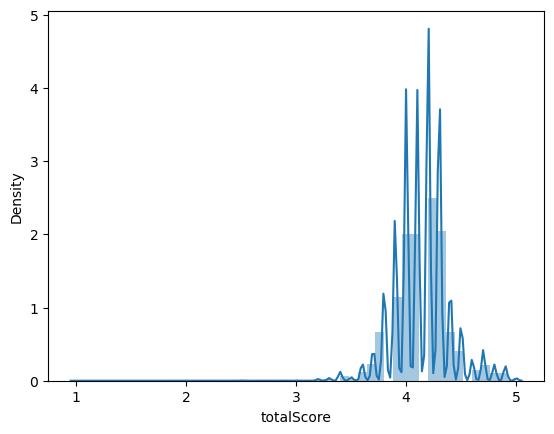

In [9]:
sns.distplot(data['totalScore'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

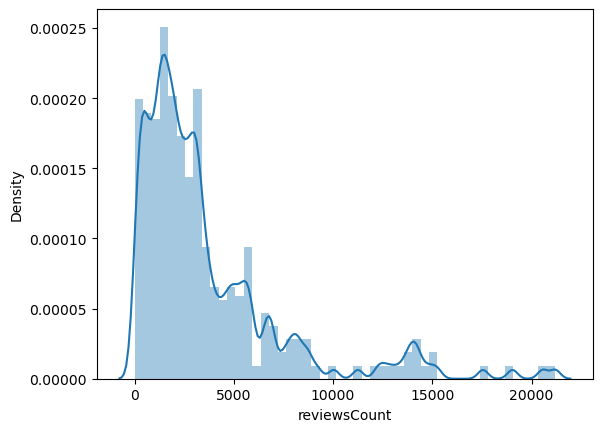

In [10]:
sns.distplot(data['reviewsCount'])
plt.show

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754019 entries, 0 to 754018
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviewId      753910 non-null  object 
 1   categoryName  754019 non-null  object 
 2   location/lat  754019 non-null  float64
 3   location/lng  754019 non-null  float64
 4   reviewsCount  754019 non-null  int64  
 5   address       754011 non-null  object 
 6   text          315279 non-null  object 
 7   title         754019 non-null  object 
 8   categories/0  754019 non-null  object 
 9   categories/1  600261 non-null  object 
 10  categories/2  470577 non-null  object 
 11  categories/3  329064 non-null  object 
 12  categories/4  236971 non-null  object 
 13  categories/5  166757 non-null  object 
 14  categories/6  113710 non-null  object 
 15  categories/7  71700 non-null   object 
 16  categories/8  43849 non-null   object 
 17  categories/9  30831 non-null   object 
 18  rati

In [12]:
se = data['categories/0'].unique()
ser0 = set(se)
s= data['categories/0'].nunique()
print(ser0)
print(s)

{'Chinese takeaway', 'Patisserie', 'Middle Eastern restaurant', 'Cake shop', 'Non vegetarian restaurant', 'Parsi restaurant', 'Kerala restaurant', 'Indian restaurant', 'American restaurant', 'Family restaurant', 'Tex-Mex restaurant', 'Bakery', 'Bar', 'French restaurant', 'Restaurant', 'Mexican restaurant', 'Halal restaurant', 'Cafe', 'Tapas bar', 'Hotel', 'Health food restaurant', 'Sandwich shop', 'Fine dining restaurant', 'Cocktail bar', 'Tea house', 'Lunch restaurant', 'Brasserie', 'South Asian restaurant', 'Indian sizzler restaurant', 'Doner kebab restaurant', 'Kebab shop', 'Tapas restaurant', 'Steak house', 'Ice cream shop', 'Hawker stall', 'Chicken restaurant', 'Korean restaurant', 'Takeout Restaurant', 'Delivery Chinese restaurant', 'Fast food restaurant', 'Dhaba', 'Fried chicken takeaway', 'Grill', 'Delivery Restaurant', 'Modern European restaurant', 'Sushi restaurant', 'Chinese restaurant', 'Buffet restaurant', 'Biryani restaurant', 'Thai restaurant', 'Pan-Asian restaurant', 'J

In [13]:
se = data['categories/1'].unique()
ser1 = set(se)
s=data['categories/1'].nunique()
print(ser1)
print(s)

{nan, 'Patisserie', 'Chinese takeaway', 'Lounge', 'Cake shop', 'Non vegetarian restaurant', 'Kerala restaurant', 'Indian restaurant', 'American restaurant', 'Family restaurant', 'Cambodian restaurant', 'Konkani restaurant', 'Bakery', 'Bar', 'Coffee store', 'Confectionery', 'General store', 'Restaurant', 'Service establishment', 'Mexican restaurant', 'Coffee stand', 'Hotel', 'Cafe', 'Health food restaurant', 'Cantonese restaurant', 'Fine dining restaurant', 'Cocktail bar', 'Tea house', 'Organic restaurant', 'Kebab shop', 'Mediterranean restaurant', 'Wedding bakery', 'Kashmiri restaurant', 'Gift shop', 'Ice cream shop', 'Coffee roasters', 'Chicken restaurant', 'Shared-use commercial kitchen', 'Takeout Restaurant', 'Delivery Chinese restaurant', 'Fast food restaurant', 'Dhaba', 'Andhra restaurant', 'Grill', 'Chinese restaurant', 'Buffet restaurant', 'Biryani restaurant', 'Thai restaurant', 'Juice shop', 'European restaurant', 'Pizza restaurant', 'Pub', 'Beer garden', 'Event venue', 'Snack

In [14]:
se = data['categories/2'].unique()
ser2 = set(se)
s=data['categories/2'].nunique()
print(ser2)
print(s)

{nan, 'Chinese takeaway', 'Patisserie', 'Middle Eastern restaurant', 'Cookie shop', 'Lounge', 'Cake shop', 'Non vegetarian restaurant', 'Indian restaurant', 'Family restaurant', 'Indonesian restaurant', 'Konkani restaurant', 'Bakery', 'Bar', 'Coffee store', 'Confectionery', 'General store', 'Restaurant', 'Mexican restaurant', 'Club', 'Halal restaurant', 'Cafe', 'Hotel', 'Coffee stand', 'Health food restaurant', 'Sandwich shop', 'Fine dining restaurant', 'Cocktail bar', 'Childrens party buffet', 'Tea house', 'Kebab shop', 'Mediterranean restaurant', 'Wedding bakery', 'Fondue restaurant', 'Ice cream shop', 'Cupcake shop', 'Chicken restaurant', 'Crab house', 'Korean restaurant', 'Dumpling restaurant', 'Takeout Restaurant', 'Delivery Chinese restaurant', 'Fast food restaurant', 'Fried chicken takeaway', 'Delivery Restaurant', 'Cake decorating equipment shop', 'Sushi restaurant', 'Chinese restaurant', 'Buffet restaurant', 'Biryani restaurant', 'Thai restaurant', 'Pan-Asian restaurant', 'Gro

In [15]:
se = data['categories/3'].unique()
ser3= set(se)
s=data['categories/3'].nunique()
print(ser3)
print(s)

{nan, 'Chinese takeaway', 'Lounge', 'Cake shop', 'Non vegetarian restaurant', 'Lebanese restaurant', 'Indian restaurant', 'Family restaurant', 'Bar', 'Gastropub', 'Coffee store', 'Greek restaurant', 'Brewery', 'Disco club', 'Restaurant', 'Mexican restaurant', 'Hotel', 'Cafe', 'Food manufacturer', 'Health food restaurant', 'Sandwich shop', 'Fine dining restaurant', 'Cocktail bar', 'Tea house', 'Lunch restaurant', 'Indian sizzler restaurant', 'Fish restaurant', 'Ice cream shop', 'Cupcake shop', 'Korean restaurant', 'Takeout Restaurant', 'Delivery Chinese restaurant', 'Fast food restaurant', 'Singaporean restaurant', 'Fried chicken takeaway', 'Delivery Restaurant', 'Chinese restaurant', 'Thai restaurant', 'Pan-Asian restaurant', 'Juice shop', 'Japanese restaurant', 'European restaurant', 'Pastry shop', 'Pizza restaurant', 'Beer garden', 'Food products supplier', 'Event venue', 'Snack bar', 'Punjabi restaurant', 'Barbecue restaurant', 'Dessert shop', 'Marathi restaurant', 'Donut shop', 'Te

In [16]:
se = data['categories/4'].unique()
ser4= set(se)
s=data['categories/4'].nunique()
print(ser4)
print(s)

{nan, 'Patisserie', 'DJ service', 'Cocktail bar', 'Pasta shop', 'Lunch restaurant', 'Food court', 'Continental restaurant', 'European restaurant', 'Pastry shop', 'Pizza restaurant', 'Mughlai restaurant', 'Indian takeaway', 'Fish restaurant', 'Cake shop', 'Wine bar', 'Coffee shop', 'Pub', 'Non vegetarian restaurant', 'Malaysian restaurant', 'Italian restaurant', 'Wedding bakery', 'Soup restaurant', 'Rajasthani restaurant', 'Event venue', 'Coworking space', 'Thai restaurant', 'Punjabi restaurant', 'Dessert restaurant', 'Shawarma restaurant', 'Breakfast restaurant', 'Indian restaurant', 'Vegetarian restaurant', 'Family restaurant', 'Dessert shop', 'Marathi restaurant', 'Frozen dessert supplier', 'Flea market', 'Pizza delivery', 'Tea store', 'Korean restaurant', 'Dumpling restaurant', 'Coffee store', 'Noodle shop', 'Takeout Restaurant', 'Fast food restaurant', 'Party planner', 'Persian restaurant', 'Restaurant', 'Southeast Asian restaurant', 'Milk delivery service', 'North Indian restauran

In [17]:
se = data['categories/5'].unique()
ser5= set(se)
s=data['categories/5'].nunique()
print(ser5)
print(s)

{nan, 'Tea house', 'Lunch restaurant', 'Italian grocery store', 'South Indian restaurant', 'Chocolate cafe', 'Fine dining restaurant', 'Continental restaurant', 'Indian sizzler restaurant', 'European restaurant', 'Pizza restaurant', 'Lounge', 'Indian takeaway', 'Vietnamese restaurant', 'Kebab shop', 'Pub', 'Mughlai restaurant', 'Non vegetarian restaurant', 'Malaysian restaurant', 'Italian restaurant', 'Rajasthani restaurant', 'Coworking space', 'Event venue', 'Punjabi restaurant', 'Dessert restaurant', 'Indian restaurant', 'Taco restaurant', 'Vegetarian restaurant', 'Family restaurant', 'Dessert shop', 'Marathi restaurant', 'Gastropub', 'Korean restaurant', 'Noodle shop', 'Live music bar', 'Fast food restaurant', 'Takeout Restaurant', 'Chocolate shop', 'Restaurant', 'Southeast Asian restaurant', 'North Indian restaurant', 'Mexican restaurant', 'Pizza Takeout', 'Delivery Restaurant', 'Momo restaurant', 'Health food restaurant', 'Chinese restaurant', 'Buffet restaurant', 'Thai restaurant

In [18]:
se = data['categories/6'].unique()
ser6= set(se)
s=data['categories/6'].nunique()
print(ser6)
print(s)

{nan, 'Food court', 'Italian grocery store', 'Juice shop', 'Middle Eastern restaurant', 'South Indian restaurant', 'Food and beverage consultant', 'Fine dining restaurant', 'Pastry shop', 'Pizza restaurant', 'Lounge', 'Fish restaurant', 'Non vegetarian restaurant', 'Soup restaurant', 'Italian restaurant', 'Punjabi restaurant', 'Fusion restaurant', 'Indian restaurant', 'Vegetarian restaurant', 'Cupcake shop', 'Marathi restaurant', 'Pizza delivery', 'Live music bar', 'Chocolate shop', 'Sushi takeaway', 'Disco club', 'Restaurant', 'Western restaurant', 'North Indian restaurant', 'Seafood restaurant', 'Mexican restaurant', 'Momo restaurant', 'Health food restaurant', 'Sushi restaurant', 'Mutton barbecue restaurant', 'Sandwich shop', 'Rice restaurant', 'Thai restaurant'}
37


In [19]:
se = data['categories/7'].unique()
ser7= set(se)
s=data['categories/7'].nunique()
print(ser7)
print(s)

{nan, 'Tea house', 'Lunch restaurant', 'South Indian restaurant', 'Lounge', 'Pizza restaurant', 'Pub', 'Soup shop', 'Mediterranean restaurant', 'Italian restaurant', 'Steak house', 'Punjabi restaurant', 'Dessert restaurant', 'Indian restaurant', 'Wok restaurant', 'Vegetarian restaurant', 'Korean restaurant', 'Coffee store', 'Takeout Restaurant', 'Live music bar', 'Restaurant', 'Southeast Asian restaurant', 'North Indian restaurant', 'Seafood restaurant', 'Mexican restaurant', 'Halal restaurant', 'Pizza Takeout', 'Meat products store', 'Sandwich shop', 'Thai restaurant'}
29


In [20]:
se = data['categories/8'].unique()
ser8= set(se)
s=data['categories/8'].nunique()
print(ser8)
print(s)

{nan, 'Lunch restaurant', 'South Indian restaurant', 'Pastry shop', 'Lounge', 'Pub', 'Mughlai restaurant', 'Vietnamese restaurant', 'Non vegetarian restaurant', 'Italian restaurant', 'Wedding bakery', 'Indian restaurant', 'Vegetarian restaurant', 'Dessert shop', 'Traditional restaurant', 'Restaurant', 'North Indian restaurant', 'Seafood restaurant', 'Delivery Restaurant', 'Sandwich shop', 'Thai restaurant'}
20


In [21]:
se = data['categories/9'].unique()
ser9= set(se)
s=data['categories/9'].nunique()
print(ser9)
print(s)

{nan, 'Vietnamese restaurant', 'Italian restaurant', 'Wholesale bakery', 'Tea house', 'Momo restaurant', 'Restaurant', 'Sandwich shop', 'Taco restaurant', 'Pub', 'Vegetarian restaurant', 'North Indian restaurant', 'Wine bar', 'Night club'}
13


In [22]:
# For all unique Cuisines 
ser=ser0|ser1|ser2|ser3|ser4|ser5|ser6|ser7|ser8|ser9 
print(ser)
print(len(ser))

{'Chinese takeaway', 'Patisserie', nan, 'DJ service', nan, nan, nan, 'Wholesale bakery', 'Middle Eastern restaurant', 'Cookie shop', 'Lounge', 'Cake shop', 'Non vegetarian restaurant', 'Parsi restaurant', 'Kerala restaurant', 'Lebanese restaurant', 'Coworking space', 'Indian restaurant', 'American restaurant', 'Family restaurant', 'Tex-Mex restaurant', 'Cambodian restaurant', 'Konkani restaurant', 'Bakery', 'Indonesian restaurant', 'Frozen dessert supplier', 'Bar', 'Gastropub', 'Coffee store', 'Confectionery', 'Greek restaurant', 'General store', 'French restaurant', 'Brewery', 'Disco club', 'Restaurant', 'Service establishment', 'Mexican restaurant', 'Club', 'Halal restaurant', 'Cafe', 'Tapas bar', 'Hotel', 'Coffee stand', 'Food manufacturer', 'Health food restaurant', 'Mutton barbecue restaurant', 'Sandwich shop', 'Cantonese restaurant', 'Japanized western restaurant', 'Fine dining restaurant', 'Cocktail bar', 'Childrens party buffet', 'Tea house', 'Lunch restaurant', 'Italian grocer

In [23]:
Cuisine=set(filter(lambda x: x == x , ser))   #For removing nan value from set
print(Cuisine)
print(len(Cuisine))

{'Chinese takeaway', 'Patisserie', 'DJ service', 'Wholesale bakery', 'Middle Eastern restaurant', 'Cookie shop', 'Lounge', 'Cake shop', 'Non vegetarian restaurant', 'Parsi restaurant', 'Kerala restaurant', 'Lebanese restaurant', 'Coworking space', 'Indian restaurant', 'American restaurant', 'Tex-Mex restaurant', 'Cambodian restaurant', 'Konkani restaurant', 'Family restaurant', 'Bakery', 'Indonesian restaurant', 'Frozen dessert supplier', 'Bar', 'Gastropub', 'Coffee store', 'Confectionery', 'Greek restaurant', 'General store', 'French restaurant', 'Brewery', 'Disco club', 'Restaurant', 'Service establishment', 'Mexican restaurant', 'Club', 'Halal restaurant', 'Cafe', 'Tapas bar', 'Hotel', 'Coffee stand', 'Food manufacturer', 'Health food restaurant', 'Mutton barbecue restaurant', 'Sandwich shop', 'Cantonese restaurant', 'Japanized western restaurant', 'Fine dining restaurant', 'Cocktail bar', 'Childrens party buffet', 'Tea house', 'Lunch restaurant', 'Italian grocery store', 'Brasserie

In [24]:
type(Cuisine)

set

In [25]:
Cuisine

{'Afghan restaurant',
 'American restaurant',
 'Andhra restaurant',
 'Art cafe',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Authentic Japanese restaurant',
 'Awadhi restaurant',
 'Bakery',
 'Bakery equipment',
 'Baking supply store',
 'Banquet hall',
 'Bar',
 'Bar & grill',
 'Barbecue restaurant',
 'Basque restaurant',
 'Beer garden',
 'Belgian restaurant',
 'Bengali restaurant',
 'Beverage distributor',
 'Biryani restaurant',
 'Bistro',
 'Box lunch supplier',
 'Brasserie',
 'Breakfast restaurant',
 'Brewery',
 'Brewpub',
 'Brunch restaurant',
 'Buffet restaurant',
 'Cafe',
 'Cake decorating equipment shop',
 'Cake shop',
 'Cambodian restaurant',
 'Candy store',
 'Cantabrian restaurant',
 'Cantonese restaurant',
 'Caterer',
 'Chicken restaurant',
 'Chicken shop',
 'Chicken wings restaurant',
 'Childrens party buffet',
 'Chinese noodle restaurant',
 'Chinese restaurant',
 'Chinese takeaway',
 'Chocolate cafe',
 'Chocolate shop',
 'Club',
 'Cocktail bar',
 'Coffee roasters',
 'Co

In [26]:
x=str(input("Enter the Cuisine: "))

Enter the Cuisine: South Indian restaurant


In [27]:
Sel_Cuisine=data.loc[(data['categories/0']== x)| (data['categories/1']== x)|(data['categories/2']== x)|(data['categories/3']== x)|(data['categories/4']== x)|(data['categories/5']== x)|(data['categories/6']== x)|(data['categories/7']== x)|(data['categories/8']==x)|(data['categories/9']== x)]
print(Sel_Cuisine)

                                    reviewId             categoryName  \
19333    ChZDSUhNMG9nS0VJQ0FnSUR4dnJxVUt3EAE  South Indian restaurant   
19334    ChZDSUhNMG9nS0VJQ0FnSUR4cnZ5bWV3EAE  South Indian restaurant   
19335   ChdDSUhNMG9nS0VJQ0FnSUR4cm9TQnZnRRAB  South Indian restaurant   
19336   ChdDSUhNMG9nS0VJQ0FnSUR4MXB1NTFRRRAB  South Indian restaurant   
19337    ChZDSUhNMG9nS0VJQ0FnSUR4cHNMTWVREAE  South Indian restaurant   
...                                      ...                      ...   
743230  ChdDSUhNMG9nS0VJQ0FnSUNoOHM3RzV3RRAB               Restaurant   
743231  ChdDSUhNMG9nS0VJQ0FnSUNoOG83bHNnRRAB               Restaurant   
743232  ChdDSUhNMG9nS0VJQ0FnSUNoOG83S3pnRRAB               Restaurant   
743233  ChdDSUhNMG9nS0VJQ0FnSUNoOHJhZnNBRRAB               Restaurant   
743234   ChZDSUhNMG9nS0VJQ0FnSUNoOHZxZ1hBEAE               Restaurant   

        location/lat  location/lng  reviewsCount  \
19333      18.519223     73.875703          5586   
19334      18.51922

In [28]:
sentiment=Sel_Cuisine.iloc[:,[2,3,5,6,7,19,20]]
print(sentiment)

        location/lat  location/lng  \
19333      18.519223     73.875703   
19334      18.519223     73.875703   
19335      18.519223     73.875703   
19336      18.519223     73.875703   
19337      18.519223     73.875703   
...              ...           ...   
743230     18.544941     73.930898   
743231     18.544941     73.930898   
743232     18.544941     73.930898   
743233     18.544941     73.930898   
743234     18.544941     73.930898   

                                                  address  \
19333   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19334   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19335   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19336   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19337   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
...                                                   ...   
743230  2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...   
743231  2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun.

In [29]:
sentiment['text']= sentiment['text'].astype(str)   #for converting string
sentiment

,location/lat,location/lng,address,text,title,stars,totalScore
19333,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",nan,Supriya Restaurant,5.0,4.2
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",South Indian dishes are super tasty,Supriya Restaurant,4.0,4.2
19335,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",nan,Supriya Restaurant,4.0,4.2
19336,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",nan,Supriya Restaurant,5.0,4.2
19337,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",nan,Supriya Restaurant,5.0,4.2
...,...,...,...,...,...,...,...
743230,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...",nan,Eat N Carry,5.0,4.9
743231,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...","Best South Indian food ever, just like our hom...",Eat N Carry,5.0,4.9
743232,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...",Nice authentic South Indian food I had tasted ...,Eat N Carry,5.0,4.9
743233,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...",Home quality Food with quality and with reason...,Eat N Carry,5.0,4.9


In [30]:
print(type(sentiment))
print(sentiment)

<class 'pandas.core.frame.DataFrame'>
        location/lat  location/lng  \
19333      18.519223     73.875703   
19334      18.519223     73.875703   
19335      18.519223     73.875703   
19336      18.519223     73.875703   
19337      18.519223     73.875703   
...              ...           ...   
743230     18.544941     73.930898   
743231     18.544941     73.930898   
743232     18.544941     73.930898   
743233     18.544941     73.930898   
743234     18.544941     73.930898   

                                                  address  \
19333   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19334   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19335   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19336   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19337   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
...                                                   ...   
743230  2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...   
743231  2, Old Mu

In [31]:
sentiment.replace('nan', np.nan, inplace = True)
sentiment= sentiment.dropna()
print(sentiment)
sentiment

        location/lat  location/lng  \
19334      18.519223     73.875703   
19338      18.519223     73.875703   
19341      18.519223     73.875703   
19344      18.519223     73.875703   
19345      18.519223     73.875703   
...              ...           ...   
743229     18.544941     73.930898   
743231     18.544941     73.930898   
743232     18.544941     73.930898   
743233     18.544941     73.930898   
743234     18.544941     73.930898   

                                                  address  \
19334   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19338   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19341   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19344   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
19345   Gitanjali Kunj, Opposite Nehru Memorial Hall, ...   
...                                                   ...   
743229  2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...   
743231  2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun.

,location/lat,location/lng,address,text,title,stars,totalScore
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",South Indian dishes are super tasty,Supriya Restaurant,4.0,4.2
19338,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",Nothing beats them if u looking at South India...,Supriya Restaurant,5.0,4.2
19341,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",Amazing service and delicious food,Supriya Restaurant,4.0,4.2
19344,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...","Good ambience, reasonable prices and tasty foo...",Supriya Restaurant,5.0,4.2
19345,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",Loved दही वडा,Supriya Restaurant,5.0,4.2
...,...,...,...,...,...,...,...
743229,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...",I have been to this restaurant it was very goo...,Eat N Carry,5.0,4.9
743231,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...","Best South Indian food ever, just like our hom...",Eat N Carry,5.0,4.9
743232,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...",Nice authentic South Indian food I had tasted ...,Eat N Carry,5.0,4.9
743233,18.544941,73.930898,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...",Home quality Food with quality and with reason...,Eat N Carry,5.0,4.9


In [32]:
def is_special(text):                # Remove special characters¶
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

sentiment.text = sentiment.text.apply(is_special)
print(sentiment.text)

19334                   South Indian dishes are super tasty
19338     Nothing beats them if u looking at South India...
19341                    Amazing service and delicious food
19344     Good ambience  reasonable prices and tasty foo...
19345                                         Loved दह  वड 
                                ...                        
743229    I have been to this restaurant it was very goo...
743231    Best South Indian food ever  just like our hom...
743232    Nice authentic South Indian food I had tasted ...
743233    Home quality Food with quality and with reason...
743234    Must try Andhra food here  Low price with Best...
Name: text, Length: 27490, dtype: object


In [33]:
def to_lower(text):    # Convert everything to lowercase
    return text.lower()

sentiment.text = sentiment.text.apply(to_lower)
sentiment.text

19334                   south indian dishes are super tasty
19338     nothing beats them if u looking at south india...
19341                    amazing service and delicious food
19344     good ambience  reasonable prices and tasty foo...
19345                                         loved दह  वड 
                                ...                        
743229    i have been to this restaurant it was very goo...
743231    best south indian food ever  just like our hom...
743232    nice authentic south indian food i had tasted ...
743233    home quality food with quality and with reason...
743234    must try andhra food here  low price with best...
Name: text, Length: 27490, dtype: object

In [34]:
sentiment.text=sentiment.text.apply(str)
def rem_stopwords(text):                                   # remove stopwords 
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]
sentiment.text = sentiment.text.apply(rem_stopwords)
sentiment.text

19334                 [south, indian, dishes, super, tasty]
19338     [nothing, beats, u, looking, south, indian, fo...
19341                   [amazing, service, delicious, food]
19344     [good, ambience, reasonable, prices, tasty, fo...
19345                                       [loved, दह, वड]
                                ...                        
743229    [restaurant, good, amazing, taste, get, pure, ...
743231    [best, south, indian, food, ever, like, home, ...
743232    [nice, authentic, south, indian, food, tasted,...
743233    [home, quality, food, quality, reasonable, price]
743234    [must, try, andhra, food, low, price, best, qu...
Name: text, Length: 27490, dtype: object

In [35]:
def stem_txt(text):                                       #stem words
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

sentiment.text = sentiment.text.apply(stem_txt)
sentiment.text

19334                         south indian dish super tasti
19338     noth beat u look south indian food infact item...
19341                               amaz servic delici food
19344     good ambienc reason price tasti food order veg...
19345                                            love दह वड
                                ...                        
743229    restaur good amaz tast get pure tast andhra pr...
743231           best south indian food ever like home food
743232    nice authent south indian food tast long time ...
743233               home qualiti food qualiti reason price
743234    must tri andhra food low price best qualiti fo...
Name: text, Length: 27490, dtype: object

In [36]:
def calcPolarity(text):                              #Polarity
    return TextBlob(text).sentiment.polarity

In [37]:
def calcSubjectivity(text):                          #Subjectivity
    return TextBlob(text).sentiment.subjectivity

In [38]:
def segmentation(text):
    if text > 0:
        return 'positive'
    elif text == 0 :
        return 'neutral'
    else:
        return 'negative'

In [39]:
sentiment['tPolarity']=sentiment['text'].apply(calcPolarity)
sentiment['tSubjectivity']=sentiment['text'].apply(calcSubjectivity)
sentiment['segmentation']=sentiment['tPolarity'].apply(segmentation)

In [40]:
sentiment.head()

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",south indian dish super tasti,Supriya Restaurant,4.0,4.2,0.333333,0.666667,positive
19338,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",noth beat u look south indian food infact item...,Supriya Restaurant,5.0,4.2,0.000000,0.000000,neutral
19341,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",amaz servic delici food,Supriya Restaurant,4.0,4.2,0.000000,0.000000,neutral
19344,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good ambienc reason price tasti food order veg...,Supriya Restaurant,5.0,4.2,0.700000,0.600000,positive
19345,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love दह वड,Supriya Restaurant,5.0,4.2,0.500000,0.600000,positive


In [41]:
sentiment.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,1677
neutral,5781
positive,20032


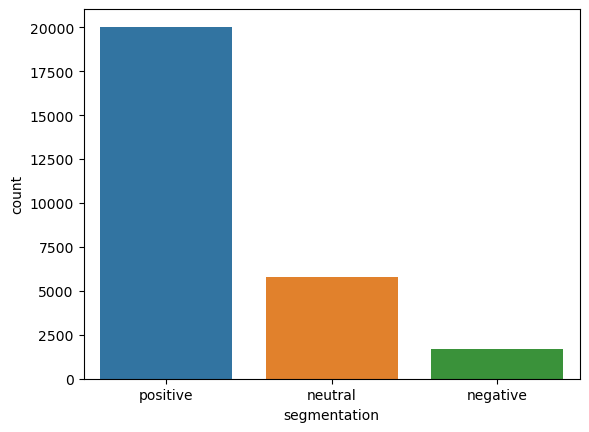

In [42]:
import seaborn as sns
sentiment['segmentation'].value_counts()
sns.countplot(data=sentiment, x='segmentation')
plt.show()

In [43]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud

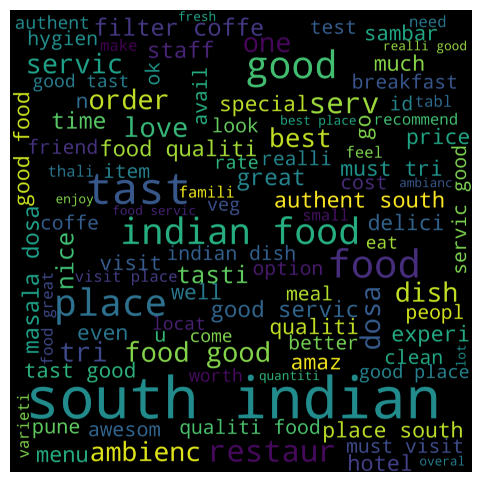

In [45]:
word_cloud_text = ''.join(sentiment[sentiment["segmentation"]=="positive"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

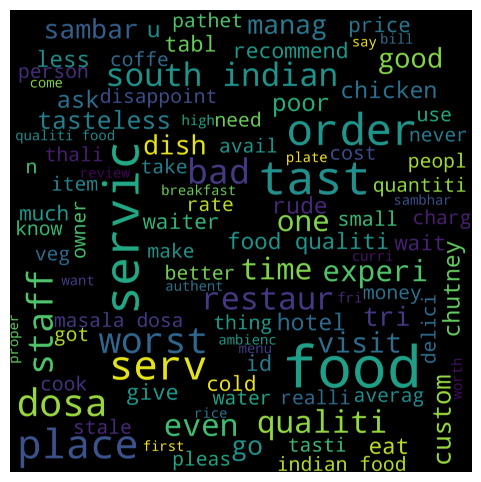

In [46]:
word_cloud_text = ''.join(sentiment[sentiment["segmentation"]=="negative"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

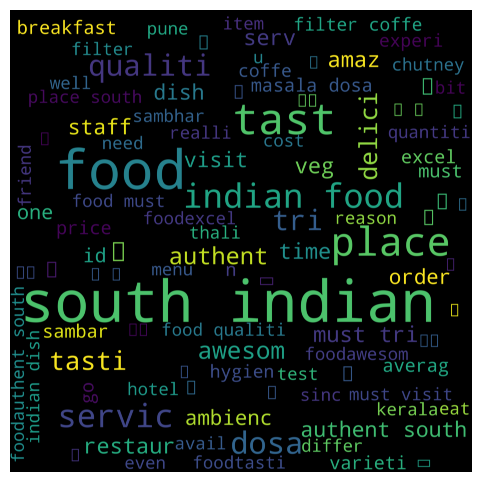

In [47]:
word_cloud_text = ''.join(sentiment[sentiment["segmentation"]=="neutral"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
sentiment.head(50)

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",south indian dish super tasti,Supriya Restaurant,4.0,4.2,0.333333,0.666667,positive
19338,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",noth beat u look south indian food infact item...,Supriya Restaurant,5.0,4.2,0.000000,0.000000,neutral
19341,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",amaz servic delici food,Supriya Restaurant,4.0,4.2,0.000000,0.000000,neutral
19344,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good ambienc reason price tasti food order veg...,Supriya Restaurant,5.0,4.2,0.700000,0.600000,positive
19345,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love दह वड,Supriya Restaurant,5.0,4.2,0.500000,0.600000,positive
19347,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",hard experi good tast veg dish restaur fulfil,Supriya Restaurant,5.0,4.2,0.204167,0.570833,positive
19350,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love restaur remind time parent use take famil...,Supriya Restaurant,4.0,4.2,0.522222,0.633333,positive
19352,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good tasti food nice locat,Supriya Restaurant,3.0,4.2,0.650000,0.800000,positive
19353,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",cozi experi,Supriya Restaurant,5.0,4.2,0.000000,0.000000,neutral
19354,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",nice,Supriya Restaurant,5.0,4.2,0.600000,1.000000,positive


# For balancing Data 

In [49]:
from sklearn.utils import resample

In [50]:
df_positive=sentiment[(sentiment['segmentation']=="positive")]
df_negative=sentiment[(sentiment['segmentation']=="negative")]
df_neutral=sentiment[(sentiment['segmentation']=="neutral")]

In [51]:
df_positive.head(5)

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",south indian dish super tasti,Supriya Restaurant,4.0,4.2,0.333333,0.666667,positive
19344,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good ambienc reason price tasti food order veg...,Supriya Restaurant,5.0,4.2,0.700000,0.600000,positive
19345,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love दह वड,Supriya Restaurant,5.0,4.2,0.500000,0.600000,positive
19347,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",hard experi good tast veg dish restaur fulfil,Supriya Restaurant,5.0,4.2,0.204167,0.570833,positive
19350,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love restaur remind time parent use take famil...,Supriya Restaurant,4.0,4.2,0.522222,0.633333,positive


In [52]:
df_negative.head(5)

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation
19390,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",review paid mafia work behind loot peopl money...,Supriya Restaurant,1.0,4.2,-0.400000,0.700000,negative
19556,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",yesterday visit restur famili member order chi...,Supriya Restaurant,5.0,4.2,-0.166667,0.833333,negative
19786,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",finest south indian food spot camp pune 1km pu...,Supriya Restaurant,5.0,4.2,-0.100000,0.400000,negative
19862,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",bad,Supriya Restaurant,1.0,4.2,-0.700000,0.666667,negative
19941,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",rush hour due sunday still abl manag servic,Supriya Restaurant,4.0,4.2,-0.125000,0.375000,negative


In [53]:
df_neutral.head(5)

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation
19338,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",noth beat u look south indian food infact item...,Supriya Restaurant,5.0,4.2,0.0,0.0,neutral
19341,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",amaz servic delici food,Supriya Restaurant,4.0,4.2,0.0,0.0,neutral
19353,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",cozi experi,Supriya Restaurant,5.0,4.2,0.0,0.0,neutral
19358,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",breakfast cooper staff,Supriya Restaurant,4.0,4.2,0.0,0.0,neutral
19360,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",grt tast grt servic,Supriya Restaurant,5.0,4.2,0.0,0.0,neutral


# upsample minority class

In [54]:
df_minority_negative = resample(df_negative,
                               replace=True,      # sample with replacement
                               n_samples= 20032,   # to match majority class
                               random_state=42)   # reproducible results

In [55]:
df_minority_neutral = resample(df_neutral,
                               replace=True,
                               n_samples= 20032,
                               random_state=42)

In [56]:
# commbine majority class with minority class
df_balanced = pd.concat([df_positive,df_minority_negative,df_minority_neutral])

In [57]:
df_balanced

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",south indian dish super tasti,Supriya Restaurant,4.0,4.2,0.333333,0.666667,positive
19344,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good ambienc reason price tasti food order veg...,Supriya Restaurant,5.0,4.2,0.700000,0.600000,positive
19345,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love दह वड,Supriya Restaurant,5.0,4.2,0.500000,0.600000,positive
19347,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",hard experi good tast veg dish restaur fulfil,Supriya Restaurant,5.0,4.2,0.204167,0.570833,positive
19350,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love restaur remind time parent use take famil...,Supriya Restaurant,4.0,4.2,0.522222,0.633333,positive
...,...,...,...,...,...,...,...,...,...,...
222814,18.542252,73.789691,"Pashan, Pune, Maharashtra 411021, India",like paneer chilli,Madurai South Indian Food Restaurant,1.0,4.3,0.000000,0.000000,neutral
223743,18.565334,73.807382,"Nagras Rd, Harmony Society, Ward No. 8, Aundh,...",everytim went ask someth menu got repli dont l...,Upsouth Aundh,1.0,3.9,0.000000,0.000000,neutral
219122,18.489062,73.869131,"281, Market Yard Rd, In front of Shivaji Statu...",arrog maneg staff,Anna,1.0,4.1,0.000000,0.000000,neutral
247970,18.519126,73.878505,"6, Moledina Road, Opposite Westend Theatre, Ca...",excel food,RamKrishna Restaurant,5.0,4.4,0.000000,0.000000,neutral


In [58]:
df_balanced.isnull().any().count()

10

In [59]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60096 entries, 19334 to 247337
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location/lat   60096 non-null  float64
 1   location/lng   60096 non-null  float64
 2   address        60096 non-null  object 
 3   text           60096 non-null  object 
 4   title          60096 non-null  object 
 5   stars          60096 non-null  float64
 6   totalScore     60096 non-null  float64
 7   tPolarity      60096 non-null  float64
 8   tSubjectivity  60096 non-null  float64
 9   segmentation   60096 non-null  object 
dtypes: float64(6), object(4)
memory usage: 5.0+ MB


In [60]:
df_balanced.dropna(inplace=True)
df_balanced

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",south indian dish super tasti,Supriya Restaurant,4.0,4.2,0.333333,0.666667,positive
19344,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good ambienc reason price tasti food order veg...,Supriya Restaurant,5.0,4.2,0.700000,0.600000,positive
19345,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love दह वड,Supriya Restaurant,5.0,4.2,0.500000,0.600000,positive
19347,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",hard experi good tast veg dish restaur fulfil,Supriya Restaurant,5.0,4.2,0.204167,0.570833,positive
19350,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love restaur remind time parent use take famil...,Supriya Restaurant,4.0,4.2,0.522222,0.633333,positive
...,...,...,...,...,...,...,...,...,...,...
222814,18.542252,73.789691,"Pashan, Pune, Maharashtra 411021, India",like paneer chilli,Madurai South Indian Food Restaurant,1.0,4.3,0.000000,0.000000,neutral
223743,18.565334,73.807382,"Nagras Rd, Harmony Society, Ward No. 8, Aundh,...",everytim went ask someth menu got repli dont l...,Upsouth Aundh,1.0,3.9,0.000000,0.000000,neutral
219122,18.489062,73.869131,"281, Market Yard Rd, In front of Shivaji Statu...",arrog maneg staff,Anna,1.0,4.1,0.000000,0.000000,neutral
247970,18.519126,73.878505,"6, Moledina Road, Opposite Westend Theatre, Ca...",excel food,RamKrishna Restaurant,5.0,4.4,0.000000,0.000000,neutral


In [62]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train, y_test = train_test_split(
    df_balanced[['text']],
    df_balanced[['segmentation']],
    test_size=0.2,
    random_state=36
)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()

X_train_vect= vectorizer.fit_transform(X_train['text'])
X_test_vect= vectorizer.transform(X_test['text'])

y_train=y_train['segmentation'].map({"positive":0,"negative":1,"neutral":2})
y_test=y_test['segmentation'].map({"positive":0,"negative":1,"neutral":2})

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48076, 1)
(48076,)
(12020, 1)
(12020,)


In [65]:
print(X_train_vect.shape)
print(y_train.shape)

(48076, 9478)
(48076,)


In [66]:
from sklearn.metrics import precision_score, recall_score,roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Multinomial Model

In [67]:
model = MultinomialNB(alpha=0,fit_prior=True)
model.fit(X_train_vect,y_train)
y_predict= model.predict(X_test_vect)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4051
           1       0.88      0.96      0.92      4011
           2       0.98      0.86      0.92      3958

    accuracy                           0.92     12020
   macro avg       0.92      0.92      0.92     12020
weighted avg       0.92      0.92      0.92     12020



In [68]:
print("Training Accuracy : ",model.score(X_train_vect,y_train)*100,"%")
print("Testing Accuracy : ",model.score(X_test_vect,y_test)*100,"%")

Training Accuracy :  93.54147599633913 %
Testing Accuracy :  91.73044925124792 %


[[3775  233   43]
 [ 147 3852   12]
 [ 252  307 3399]]


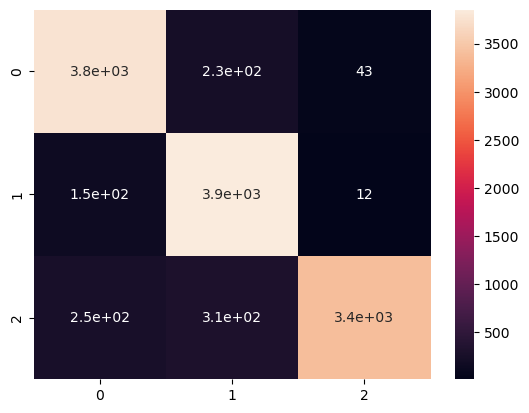

In [69]:
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [1]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_vect,y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [2]:
y_predict= knn.predict(X_test_vect)
print(classification_report(y_test,y_predict))

NameError: name 'knn' is not defined

In [73]:
print("Training Accuracy : ",knn.score(X_train_vect,y_train)*100,"%")
print("Testing Accuracy : ",knn.score(X_test_vect,y_test)*100,"%")

Training Accuracy :  83.15583659206257 %
Testing Accuracy :  81.522462562396 %


[[2089   55 1907]
 [  14 3888  109]
 [  81   55 3822]]


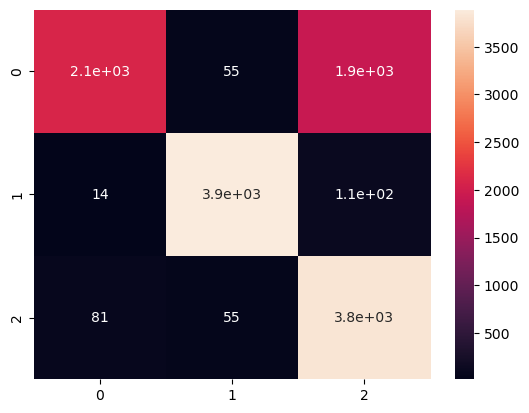

In [74]:
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=25,n_estimators=75)
model.fit(X_train_vect,y_train)
y_predict= model.predict(X_test_vect)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4051
           1       0.95      0.93      0.94      4011
           2       0.88      0.98      0.93      3958

    accuracy                           0.94     12020
   macro avg       0.94      0.94      0.94     12020
weighted avg       0.94      0.94      0.94     12020



In [76]:
print("Training Accuracy : ",model.score(X_train_vect,y_train)*100,"%")
print("Testing Accuracy : ",model.score(X_test_vect,y_test)*100,"%")

Training Accuracy :  95.1285464680922 %
Testing Accuracy :  93.7936772046589 %


[[3675  111  265]
 [  12 3725  274]
 [  19   65 3874]]


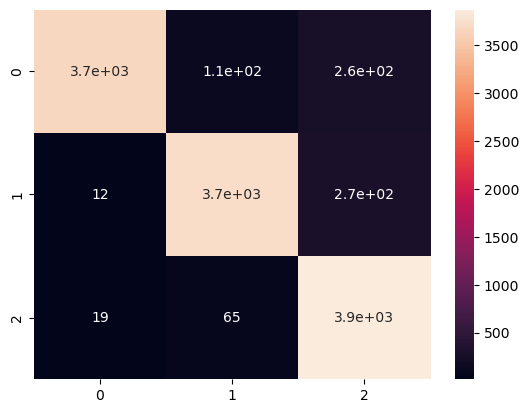

In [77]:
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# ExtraTreesClassifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X_train_vect,y_train)
y_predict= model_extra.predict(X_test_vect)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4051
           1       1.00      1.00      1.00      4011
           2       1.00      0.99      0.99      3958

    accuracy                           0.99     12020
   macro avg       0.99      0.99      0.99     12020
weighted avg       0.99      0.99      0.99     12020



In [79]:
print("Training Accuracy : ",model.score(X_train_vect,y_train)*100,"%")
print("Testing Accuracy : ",model.score(X_test_vect,y_test)*100,"%")

Training Accuracy :  95.1285464680922 %
Testing Accuracy :  93.7936772046589 %


[[4028    5   18]
 [   0 4011    0]
 [  38    0 3920]]


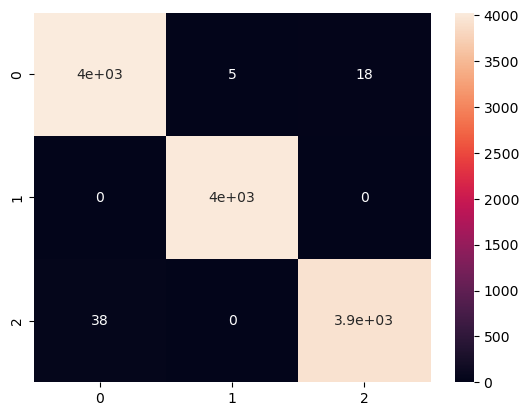

In [80]:
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train_vect,y_train)

y_predict= classifier.predict(X_test_vect)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4051
           1       0.98      1.00      0.99      4011
           2       0.98      1.00      0.99      3958

    accuracy                           0.99     12020
   macro avg       0.99      0.99      0.99     12020
weighted avg       0.99      0.99      0.99     12020



In [82]:
print("Training Accuracy : ",model.score(X_train_vect,y_train)*100,"%")
print("Testing Accuracy : ",model.score(X_test_vect,y_test)*100,"%")

Training Accuracy :  95.1285464680922 %
Testing Accuracy :  93.7936772046589 %


[[3906   64   81]
 [   5 4003    3]
 [   1    8 3949]]


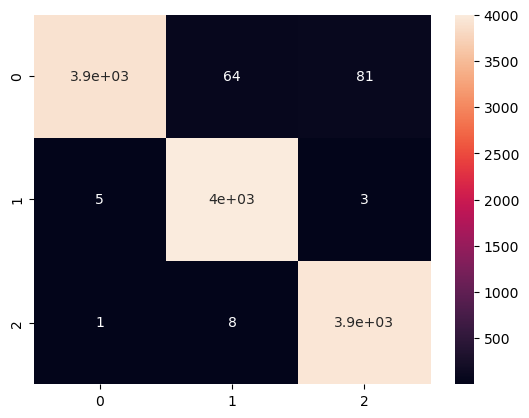

In [83]:
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# SVM

In [84]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',class_weight='balanced')

In [85]:
svc.fit(X_train_vect,y_train)
y_predict= svc.predict(X_test_vect)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4051
           1       1.00      1.00      1.00      4011
           2       1.00      0.96      0.98      3958

    accuracy                           0.98     12020
   macro avg       0.98      0.98      0.98     12020
weighted avg       0.98      0.98      0.98     12020



In [86]:
print("Training Accuracy : ",svc.score(X_train_vect,y_train)*100,"%")
print("Testing Accuracy : ",svc.score(X_test_vect,y_test)*100,"%")

Training Accuracy :  99.2615858224478 %
Testing Accuracy :  98.37770382695507 %


[[4028    4   19]
 [   0 4011    0]
 [ 171    1 3786]]


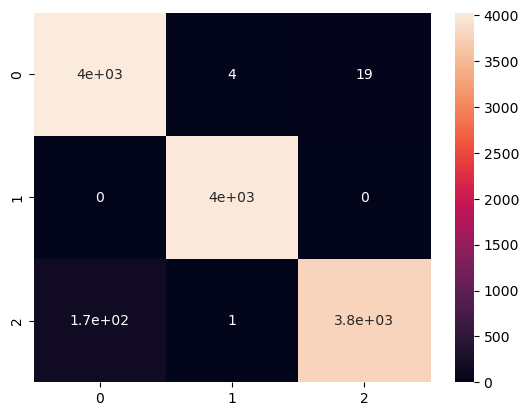

In [87]:
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

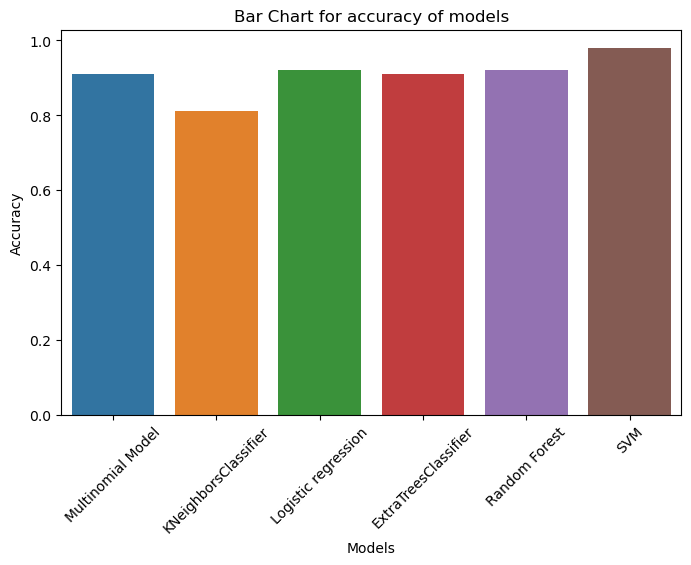

In [88]:
models = ['Multinomial Model', 'KNeighborsClassifier', 'Logistic regression', 'ExtraTreesClassifier', 'Random Forest','SVM']
accuracy = [0.91, 0.81, 0.92, 0.91, 0.92,0.98]

# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment
plt.figure(figsize = [8,5])
sns.barplot(x=models,y=accuracy)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Bar Chart for accuracy of models')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

# Sentimental Star Rating

In [89]:
def sRate(tPolarity):       #Formula for calculating sentiment based star rating
    rating=(((tPolarity - (-1))*(5-0))/(1-(-1)))+0
    return rating

In [90]:
sentiment['Srating']=sentiment['tPolarity'].apply(sRate)

In [91]:
sentiment.head(60)

,location/lat,location/lng,address,text,title,stars,totalScore,tPolarity,tSubjectivity,segmentation,Srating
19334,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",south indian dish super tasti,Supriya Restaurant,4.0,4.2,0.333333,0.666667,positive,3.333333
19338,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",noth beat u look south indian food infact item...,Supriya Restaurant,5.0,4.2,0.000000,0.000000,neutral,2.500000
19341,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",amaz servic delici food,Supriya Restaurant,4.0,4.2,0.000000,0.000000,neutral,2.500000
19344,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good ambienc reason price tasti food order veg...,Supriya Restaurant,5.0,4.2,0.700000,0.600000,positive,4.250000
19345,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love दह वड,Supriya Restaurant,5.0,4.2,0.500000,0.600000,positive,3.750000
19347,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",hard experi good tast veg dish restaur fulfil,Supriya Restaurant,5.0,4.2,0.204167,0.570833,positive,3.010417
19350,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",love restaur remind time parent use take famil...,Supriya Restaurant,4.0,4.2,0.522222,0.633333,positive,3.805556
19352,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",good tasti food nice locat,Supriya Restaurant,3.0,4.2,0.650000,0.800000,positive,4.125000
19353,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",cozi experi,Supriya Restaurant,5.0,4.2,0.000000,0.000000,neutral,2.500000
19354,18.519223,73.875703,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",nice,Supriya Restaurant,5.0,4.2,0.600000,1.000000,positive,4.000000


In [92]:
sentiment.columns

Index(['location/lat', 'location/lng', 'address', 'text', 'title', 'stars',
       'totalScore', 'tPolarity', 'tSubjectivity', 'segmentation', 'Srating'],
      dtype='object')

In [93]:
final=sentiment.groupby(['location/lat','location/lng','title','address'],as_index=False).agg({'text':'count','Srating':'mean'}).sort_values(by="Srating",ascending=False)
final

,location/lat,location/lng,title,address,text,Srating
23,18.525500,73.841349,"Dakshination (FC Road, Pune)","1 Sanas Memories, Fergusson College Rd, opposi...",53,3.919476
6,18.504781,73.854712,Raspurti Restaurant,"1050/51,Shukrawar Peth Shop No.1, Akshay Cente...",260,3.817308
32,18.552320,73.809432,Enki Kitchen & Bar,"40, ITI Rd, Goodwill Society, Sanewadi, Aundh,...",26,3.777229
20,18.519126,73.878505,RamKrishna Restaurant,"6, Moledina Road, Opposite Westend Theatre, Ca...",1272,3.649791
18,18.515477,73.846385,Sanskruti Pure Veg,"NC Kelkar Road, Narayan Peth, Pune, Maharashtr...",485,3.629584
7,18.507427,73.808377,Samarth Veg Restaurant,"Shivneri Plaza, 7, Gujarat Colony Rd, Gujrat C...",712,3.597749
21,18.519223,73.875703,Supriya Restaurant,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",1244,3.596856
3,18.503847,73.830734,Hotel Abhishek Veg,"Ground Floor, Nirmiti Eminence, 215, Gulawani ...",1010,3.596675
30,18.545678,73.668841,SHAURYA MULTICUISINE RESTAURANT,"Hanuman Chowk,Ghotawade,Tal-Mulshi,Dist-Pune,O...",83,3.585546
24,18.526197,73.842004,Niranjan,"8, Fergusson College Rd, Gokul Nagar, Shivajin...",996,3.578162


In [94]:
Restro=final[final['text'] >=100]
print(Restro)

    location/lat  location/lng                                 title  \
6      18.504781     73.854712                   Raspurti Restaurant   
20     18.519126     73.878505                 RamKrishna Restaurant   
18     18.515477     73.846385                    Sanskruti Pure Veg   
7      18.507427     73.808377                Samarth Veg Restaurant   
21     18.519223     73.875703                    Supriya Restaurant   
3      18.503847     73.830734                    Hotel Abhishek Veg   
24     18.526197     73.842004                              Niranjan   
17     18.514367     73.854346                       Agatya pure veg   
29     18.544941     73.930898                           Eat N Carry   
0      18.489062     73.869131                                  Anna   
13     18.511752     73.837144           SA DOSA CAFE (PRABHAT ROAD)   
12     18.511582     73.878701                      Priya Restaurant   
22     18.525448     73.849691          Surabhi Fast Food Restau

In [95]:
curr_loc=str(input("Enter your current location: "))

Enter your current location: Pune university, pune


In [96]:

# importing geopy library
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
 
# entering the location name
getLoc = loc.geocode(curr_loc)
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

Pune University, Ganeshkhind Road, Model Colony, Pune City, Pune District, Maharashtra, 411016, India
Latitude =  18.5415395 

Longitude =  73.829795


In [97]:
from math import sin, cos, sqrt, atan2, radians

# Approximate radius of earth in km
R = 6373.0

def resto_loc(res_lat,res_long):
    lat1 = radians(getLoc.latitude)
    lon1 = radians(getLoc.longitude)
    lat2 = radians(res_lat)
    lon2 = radians(res_long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance
Restro['distance']=Restro.apply(lambda x: resto_loc(x['location/lat'], x['location/lng']),axis=1)

In [98]:
Restro

,location/lat,location/lng,title,address,text,Srating,distance
6,18.504781,73.854712,Raspurti Restaurant,"1050/51,Shukrawar Peth Shop No.1, Akshay Cente...",260,3.817308,4.860403
20,18.519126,73.878505,RamKrishna Restaurant,"6, Moledina Road, Opposite Westend Theatre, Ca...",1272,3.649791,5.710045
18,18.515477,73.846385,Sanskruti Pure Veg,"NC Kelkar Road, Narayan Peth, Pune, Maharashtr...",485,3.629584,3.386046
7,18.507427,73.808377,Samarth Veg Restaurant,"Shivneri Plaza, 7, Gujarat Colony Rd, Gujrat C...",712,3.597749,4.415851
21,18.519223,73.875703,Supriya Restaurant,"Gitanjali Kunj, Opposite Nehru Memorial Hall, ...",1244,3.596856,5.440805
3,18.503847,73.830734,Hotel Abhishek Veg,"Ground Floor, Nirmiti Eminence, 215, Gulawani ...",1010,3.596675,4.193745
24,18.526197,73.842004,Niranjan,"8, Fergusson College Rd, Gokul Nagar, Shivajin...",996,3.578162,2.137839
17,18.514367,73.854346,Agatya pure veg,"Ganapathi Chowk Lane, Laxmi Rd, opp. Kakakuwa ...",1056,3.555097,3.979839
29,18.544941,73.930898,Eat N Carry,"2, Old Mundhwa Rd, Tukaram Nagar, Kharadi, Pun...",131,3.553054,10.668537
0,18.489062,73.869131,Anna,"281, Market Yard Rd, In front of Shivaji Statu...",1151,3.541166,7.161327


In [99]:
RECOSYS=Restro[Restro['distance'] <=5]
print(RECOSYS)

    location/lat  location/lng                                 title  \
6      18.504781     73.854712                   Raspurti Restaurant   
18     18.515477     73.846385                    Sanskruti Pure Veg   
7      18.507427     73.808377                Samarth Veg Restaurant   
3      18.503847     73.830734                    Hotel Abhishek Veg   
24     18.526197     73.842004                              Niranjan   
17     18.514367     73.854346                       Agatya pure veg   
13     18.511752     73.837144           SA DOSA CAFE (PRABHAT ROAD)   
22     18.525448     73.849691          Surabhi Fast Food Restaurant   
31     18.551962     73.804175                  SA DOSA CAFE (BANER)   
19     18.518172     73.866640                     South Indian Mess   
38     18.565334     73.807382                         Upsouth Aundh   
9      18.510521     73.815652     Janjira Seafood Resto Bar Kothrud   
37     18.565143     73.800550                           Madras 

In [100]:
RECOSYS=RECOSYS.iloc[:,[2,3,5]]

In [101]:
RECOSYS=RECOSYS.head(10)

In [102]:
RECOSYS

,title,address,Srating
6,Raspurti Restaurant,"1050/51,Shukrawar Peth Shop No.1, Akshay Cente...",3.817308
18,Sanskruti Pure Veg,"NC Kelkar Road, Narayan Peth, Pune, Maharashtr...",3.629584
7,Samarth Veg Restaurant,"Shivneri Plaza, 7, Gujarat Colony Rd, Gujrat C...",3.597749
3,Hotel Abhishek Veg,"Ground Floor, Nirmiti Eminence, 215, Gulawani ...",3.596675
24,Niranjan,"8, Fergusson College Rd, Gokul Nagar, Shivajin...",3.578162
17,Agatya pure veg,"Ganapathi Chowk Lane, Laxmi Rd, opp. Kakakuwa ...",3.555097
13,SA DOSA CAFE (PRABHAT ROAD),"Prabhat road, Lane no 8, Karve Rd, near garwar...",3.517010
22,Surabhi Fast Food Restaurant,"1170/3, Laxmi Balwant Chamber, J.M. Road, Pune...",3.505570
31,SA DOSA CAFE (BANER),"Shop no, 2, Baner Rd, opp. Green Park Hotel, n...",3.504280
19,South Indian Mess,"No. 206, Kundan Apartment, 1st Floor, opp. KEM...",3.495109
